<a href="https://colab.research.google.com/github/carnival77/Machine_Learning/blob/master/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Input Data**

* load the data file ('mnist_test.csv')
* each row of the data consists of the label and the image pixel values in a vector form
* the label is one of the 10 digits from 0 to 9
* the image represents one of the 10 digits from 0 to 9 in grey scale and its size is 28x28

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import csv

file_data   = "/content/drive/My Drive/Colab Notebooks/assignment8/mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

## mine------------------

arr_label=[]
arr_image=[]
## ----------------------

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])

    list_label[count]       = label
    list_image[:, count]    = im_vector

     ## mine----------------

    arr_label.append(label)
    arr_image.append(line_data[1:])

     ##-------------------

    count += 1



# 
# plot first 100 images out of 10,000 with their labels
# 
# f1 = plt.figure(1)

# for i in range(100):

#     label       = list_label[i]
#     im_vector   = list_image[:, i]
#     im_matrix   = im_vector.reshape((size_row, size_col))

#     # plt.subplot(10, 10, i+1)
#     plt.title(label)
#     plt.imshow(im_matrix, cmap='Greys', interpolation='None')

#     frame   = plt.gca()
#     frame.axes.get_xaxis().set_visible(False)
#     frame.axes.get_yaxis().set_visible(False)

# plt.show()

#**2. Average Image for Each Digit**
#1. **Plot the average image**



* take the arithmatic average of the image data with the same label for each digit

* plot the average images of the same label for each digit
* arrange the subplots in 2x5 array for the 10 average images and present the label at the title of each subplot in the increasing order of the label


('0', ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '11', '150', '253', '202', '31', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '37', '251', '251', '253', '107', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '21', '197', '251', '251', '253', '107', '0', '0', '0', '0', '0', '0', '0', '0', 

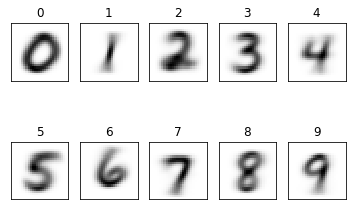

In [9]:
# 라벨 같은 이미지끼리 추리기

cnt = 0
label=['0','1','2','3','4','5','6','7','8','9']
complete=0

label_vector=[]

for i in range(10):
  label_vector.append([])

while(complete<10):
  for i in enumerate(arr_label):
    if(i[1]==label[cnt]):
        label_vector[cnt].append((label[cnt],arr_image[i[0]]))
  cnt+=1
  complete+=1

# 벡터 평균 구하기

print(label_vector[0][0]) # label+label_ele_vector

print(label_vector[0][0][1]) # label_ele_vector

# print(len(label_vector[0])) # label_ele_num. label 0

label_ele_num=[] # 각 라벨 별 요소 개수

for i in range(10):
  label_ele_num.append(len(label_vector[i]))

# print(label_ele_num)

vectors = [] # 각 라벨별 벡터 리스트.

for i in range(10):
  vectors.append([])

cnt=0

while(cnt<10):

  temp=[]

  for i in range(28*28):
    a=0
    for j in range(label_ele_num[cnt]): 
      a+=int(label_vector[cnt][j][1][i])
    temp.append(a)

  vectors[cnt].append(temp)

  cnt+=1

cnt = 0

avg_label_vector = [] # 각 라벨별 벡터의 평균 리스트

for i in range(10):
  avg_label_vector.append([])

while(cnt<10):

  temp=[]

  for i in range(28*28):
    a=0
    for j in range(label_ele_num[cnt]):
      a+=int(label_vector[cnt][j][1][i])
    temp.append(a)

  for i in range(28*28):
    temp[i]/=label_ele_num[cnt]
  avg_label_vector[cnt].append(temp)

  cnt+=1

#------------------- 이미지 제시 ----------------------- 

num_image = 10
count=0

list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

# im_vector=[]

for i in range(10):

    im_vector   = np.asfarray(avg_label_vector[i])

    # print(im_vector)

    # list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1

# print(im_vector)
# print(list_image)
# print(len(list_image))

## 그림으로 나타내기

f2 = plt.figure(1)

for i in range(10):

    plt_label   = label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(plt_label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

#**2. Present the output of the neural network with random weights**

* consider a neural network with a fully connected layer using a logistic unit without a bias
* assign random values from the normal distribution N(0,1)\mathcal{N}(0, 1)N(0,1) with mean 0 and standard deviation 1 to the weights of the fully connected layer using a logistic unit without a bias
* compute the forward propagation and take the average of the output values for the images of the same label
* present the average values for each label in the increasing order of the label

In [10]:
# avg_label_vector = [] # 각 라벨별 벡터의 평균 리스트

# vectors = [] # 각 라벨별 벡터의 자릿수별 합 리스트.

# label_ele_num=[] # 각 라벨 별 요소 개수

# label=['0','1','2','3','4','5','6','7','8','9']

# list_image
# list_label

# label_vector[0][0] # label+label_ele_vector. 0번째 라벨 집합의 0번째 요소.

# print(label_vector[0][0][1]) # label_ele_vector. 0번째 라벨 집합의 0번째 요소의 벡터만

num_image=10000

# y = np.empty((size_row * size_col, num_image), dtype=float)

all_z=[]

for i in range(10):
  all_z.append([])

# all_z = np.empty((len(label),size_row * size_col, num_image), dtype=float)

# all_z = np.empty((size_row * size_col, num_image), dtype=float)

# for cnt in range(10):
#   for ele_num in label_ele_num:
#     z = np.empty((size_row * size_col, ele_num), dtype=float)
#     all_z[cnt]=z

np.random.seed(28*28)

mu,sigma = 0.0,1.0

rand_norm = np.random.normal(mu,sigma,size=28*28)

# rand_norm = np.random.randn(28*28)

cnt=0

t=0

while(cnt<10):

  for i in range(label_ele_num[cnt]):

    z = np.empty((size_row * size_col, label_ele_num[cnt]), dtype=float)

    im_vector   = np.asfarray(label_vector[cnt][i][1])

    theta_x_input = rand_norm*im_vector

    y    = theta_x_input

    sigmoid = 1/(1+np.exp(-y))

    z[:,i]    = sigmoid

  all_z[cnt].append(z)

  cnt+=1

cnt=0

# print(all_z[2])

# print(len(all_z))
# print(len(all_z[3])) ## 1. label   2. ?  3. input 개수(28*28)  4. 각 라벨의 개수
# print(len(all_z[5][0]))
# print(len(all_z[2][0][0]))

result=[]

for i in range(10):
  result.append([])

for cnt in range(10):
  result[cnt]=np.mean(all_z[cnt])


# np.set_printoptions(precision=3)

for i in range(10):
  print(result[i])

# for i in range(10):
#   print('%.5f' % result[i])

# print(round(result[3],2))





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: overflow encountered in exp


0.3713067022132664
7.17368959365948
25.985576630788128
23.229710825917973
24.125027810502125
0.5033397175694522
0.5004449231049528
0.4610540814991186
0.5042263486678821
8.007944659893003


#**Result**

#**1. Plot the average image**

* plot the average images of the same label for each digit
* arrange the subplots in 2x5 array for the 10 average images and present the label at the title of each subplot in the increasing order of the label

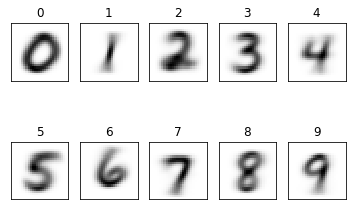

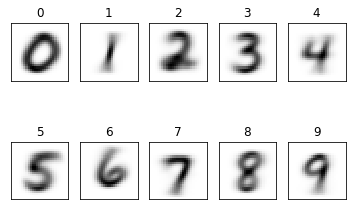

In [11]:
f2 = plt.figure(1)

for i in range(10):

    plt_label   = label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(plt_label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

#**2. Present the output of the neural network with random weights**

In [12]:
for i in range(10):
  print(result[i])

14.124141803121349
26.462983910806194
26.04981995166299
23.20877477823157
24.072651360940633
0.5033397175694522
22.619904972918818
0.25254662696088304
0.5042263486678821
0.25183131267106035
0.3713067022132664
7.17368959365948
25.985576630788128
23.229710825917973
24.125027810502125
0.5033397175694522
0.5004449231049528
0.4610540814991186
0.5042263486678821
8.007944659893003
